In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_images_in_folder(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            image_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(image_path)
                image_list.append(img)
            except IOError:
                print(f"Failed to open image: {image_path}")
    return image_list
folder_path = '/content/drive/MyDrive/ColTran_dataset/ColTran_dataset/'
images = read_images_in_folder(folder_path)

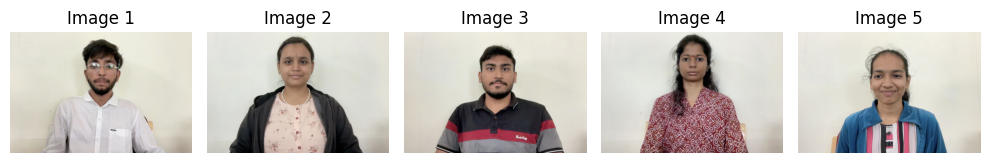

In [ ]:
if images:
    plt.figure(figsize=(10, 6))
    for i, img in enumerate(images[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {i + 1}")
    plt.tight_layout()
    plt.show()

In [ ]:
def scale_images(images, target_size=(120, 120)):
    scaled_images = [img.resize(target_size, Image.ANTIALIAS) for img in images]
    return scaled_images
color_images = scale_images(images)

<ipython-input-43-725fc82a8f0c>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  scaled_images = [img.resize(target_size, Image.ANTIALIAS) for img in images]


In [ ]:
def are_images_scaled(images, target_size=(120, 120)):
    for img in images:
        if img.size != target_size:
            return False
    return True
result = are_images_scaled(color_images)
if result:
    print("All images are scaled to 120x120.")
else:
    print("Not all images are scaled to 120x120.")

All images are scaled to 120x120.


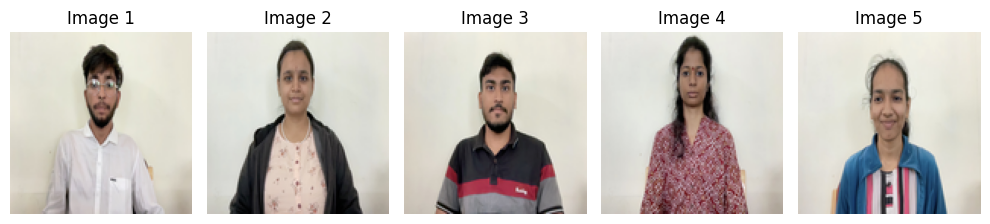

In [ ]:
if color_images:
    plt.figure(figsize=(10, 6))
    for i, img in enumerate(color_images[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {i + 1}")
    plt.tight_layout()
    plt.show()

In [ ]:
def convert_to_black_and_white(images):
    black_white_images = [img.convert('L') for img in images]
    return black_white_images
def save_images(images, output_directory):
    for i, img in enumerate(images):
        img.save(f'{output_directory}/processed_image_{i+1}.jpg')
folder_path = '/content/drive/MyDrive/ColTran_dataset/ColTran_dataset/'
images = read_images_in_folder(folder_path)
grey_images = convert_to_black_and_white(color_images)
output_directory_bw = '/content/drive/MyDrive/ColTran_dataset/processed_images_bw'
save_images(grey_images, output_directory_bw)

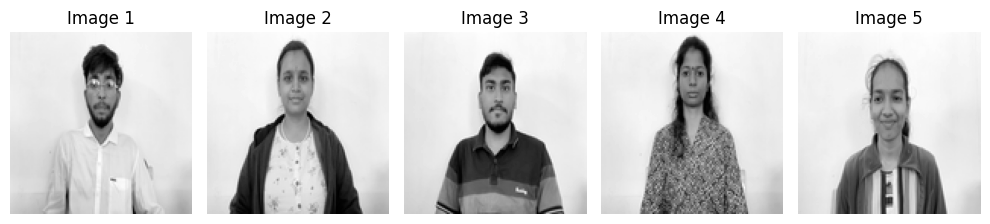

In [ ]:
if grey_images:
    plt.figure(figsize=(10, 6))
    for i, img in enumerate(grey_images[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"Image {i + 1}")
    plt.tight_layout()
    plt.show()


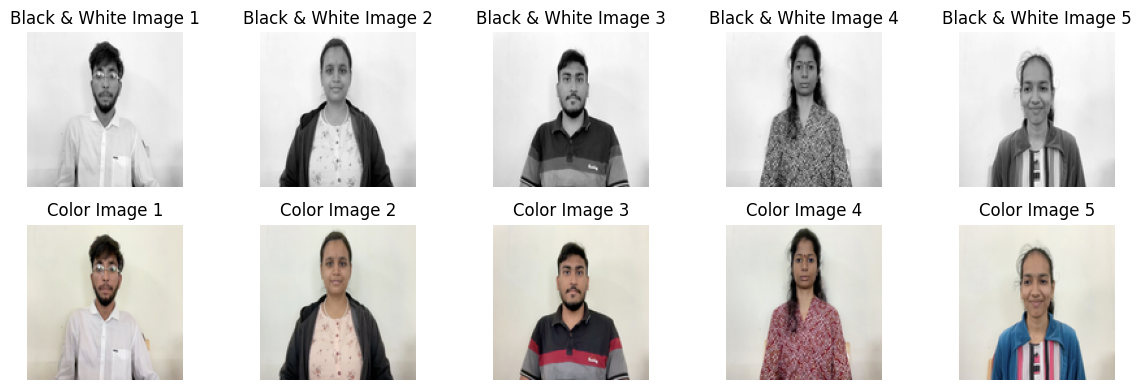

In [ ]:
if grey_images and color_images and len(grey_images) >= 5 and len(color_images) >= 5:
    plt.figure(figsize=(12, 4))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(grey_images[i], cmap='gray')
        plt.title(f"Black & White Image {i + 1}")
        plt.axis('off')

        plt.subplot(2, 5, 5 + i + 1)
        plt.imshow(color_images[i])
        plt.title(f"Color Image {i + 1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient data: There should be at least 5 black and white and 5 color images.")


In [ ]:
def images_to_array(images):
    image_array = [np.array(img) for img in images]
    return np.array(image_array)
X = images_to_array(color_images)
Y= images_to_array(grey_images)
print(X)

In [ ]:
from sklearn.model_selection import train_test_split
all_images = list(zip(grey_images, color_images))

train_data, test_data = train_test_split(all_images, test_size=0.3, random_state=42)

train_black_white_images, train_colored_images = zip(*train_data)
test_black_white_images, test_colored_images = zip(*test_data)